# 課程目標

利用Keras 的 CIFAR10 dataset 來驗證損失函數對於模型精確度的影響

# 範例重點: 
    
    模型架構的層數
    
    使用何種LOSS function

# 導入必要的libray

In [1]:
import keras
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)
#np.random.seed(10)的作用：使得隨機數據可預測

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras CIFAR10 Dataset, 並分成Training 與 Test set
(x_img_train,y_label_train),(x_img_test,y_label_test) = cifar10.load_data()

In [4]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [5]:
#資料正規化, 並設定 data array 為浮點數
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [6]:
#針對Label 做 ONE HOT ENCODE, 並查看維度資訊
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

In [7]:
y_label_test_OneHot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

# 建立模型

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [9]:
# 宣告採用序列模型
model = Sequential()

W0729 23:22:42.578387  6876 deprecation_wrapper.py:119] From D:\software\Anaconda3\envs\practice\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



## 卷積層1與池化層1

In [10]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

W0729 23:24:18.669616  6876 deprecation_wrapper.py:119] From D:\software\Anaconda3\envs\practice\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0729 23:24:20.875104  6876 deprecation_wrapper.py:119] From D:\software\Anaconda3\envs\practice\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0729 23:24:23.347742  6876 deprecation_wrapper.py:119] From D:\software\Anaconda3\envs\practice\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



## 卷積層2與池化層2

In [11]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

## 卷積層3與池化層3

In [12]:
model.add(Conv2D(filters=128, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

## 卷積層4與池化層4

In [13]:
model.add(Conv2D(filters=256, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [14]:
#建立神經網路(平坦層、隱藏層、輸出層)
model.add(Flatten())

In [15]:
#建立全網路連接層
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))

In [16]:
#建立輸出層
model.add(Dense(10, activation='softmax'))

In [17]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 256)         295168    
__________

# 載入之前訓練的模型

In [18]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [19]:
#模型編譯
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

W0729 23:31:26.862442  6876 deprecation_wrapper.py:119] From D:\software\Anaconda3\envs\practice\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0729 23:31:26.910477  6876 deprecation_wrapper.py:119] From D:\software\Anaconda3\envs\practice\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [20]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

W0729 23:32:14.561395  6876 deprecation.py:323] From D:\software\Anaconda3\envs\practice\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0729 23:32:14.773534  6876 deprecation_wrapper.py:119] From D:\software\Anaconda3\envs\practice\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 883s 24ms/step - loss: 1.6657 - acc: 0.3811 - val_loss: 1.3772 - val_acc: 0.4986
Epoch 2/12
37500/37500 [==============================] - 208s 6ms/step - loss: 1.2487 - acc: 0.5457 - val_loss: 1.1426 - val_acc: 0.5909
Epoch 3/12
37500/37500 [==============================] - 210s 6ms/step - loss: 1.0424 - acc: 0.6254 - val_loss: 1.0139 - val_acc: 0.6496
Epoch 4/12
37500/37500 [==============================] - 203s 5ms/step - loss: 0.8937 - acc: 0.6835 - val_loss: 0.9212 - val_acc: 0.6790
Epoch 5/12
37500/37500 [==============================] - 207s 6ms/step - loss: 0.7739 - acc: 0.7274 - val_loss: 0.9026 - val_acc: 0.6898
Epoch 6/12
37500/37500 [==============================] - 211s 6ms/step - loss: 0.6691 - acc: 0.7652 - val_loss: 0.9025 - val_acc: 0.6910
Epoch 7/12
37500/37500 [==============================] - 209s 6ms/step - loss: 0.5850 - acc: 0.7938 - val_loss: 0.8838 -

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

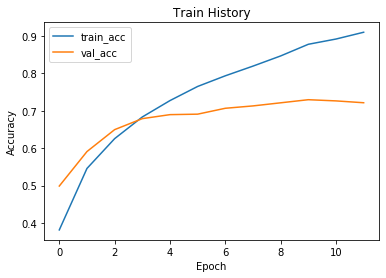

In [22]:
show_train_history('acc','val_acc')

#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [24]:
model = Sequential()

In [25]:
#卷積層1
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [26]:
model.add(Dropout(rate=0.25))

W0730 00:33:58.192665  6876 deprecation.py:506] From D:\software\Anaconda3\envs\practice\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [27]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [28]:
#卷積層2與池化層2
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [29]:
model.add(Dropout(0.25))

In [30]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [31]:
#建立神經網路(平坦層、隱藏層、輸出層)
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [32]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [33]:
model.add(Dense(10, activation='softmax'))

In [34]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
__________

# 訓練模型

作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate


In [35]:
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])

In [36]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 197s 5ms/step - loss: 0.0907 - acc: 0.0968 - val_loss: 0.0900 - val_acc: 0.1110
Epoch 2/12
37500/37500 [==============================] - 204s 5ms/step - loss: 0.0903 - acc: 0.1032 - val_loss: 0.0899 - val_acc: 0.1247
Epoch 3/12
37500/37500 [==============================] - 200s 5ms/step - loss: 0.0901 - acc: 0.1100 - val_loss: 0.0898 - val_acc: 0.1360
Epoch 4/12
37500/37500 [==============================] - 200s 5ms/step - loss: 0.0899 - acc: 0.1177 - val_loss: 0.0897 - val_acc: 0.1446
Epoch 5/12
37500/37500 [==============================] - 203s 5ms/step - loss: 0.0899 - acc: 0.1212 - val_loss: 0.0896 - val_acc: 0.1519
Epoch 6/12
37500/37500 [==============================] - 199s 5ms/step - loss: 0.0897 - acc: 0.1311 - val_loss: 0.0896 - val_acc: 0.1571
Epoch 7/12
37500/37500 [==============================] - 190s 5ms/step - loss: 0.0896 - acc: 0.1368 - val_loss: 0.0895 - 

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

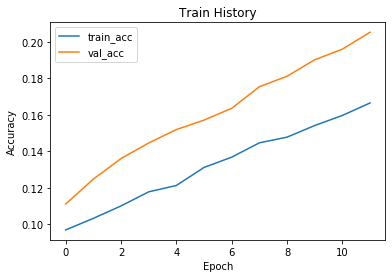

In [38]:
show_train_history('acc','val_acc')

In [40]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [41]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 700s 19ms/step - loss: 0.3172 - acc: 0.9000 - val_loss: 0.3166 - val_acc: 0.9000
Epoch 2/12
37500/37500 [==============================] - 184s 5ms/step - loss: 0.3115 - acc: 0.9000 - val_loss: 0.3118 - val_acc: 0.9000
Epoch 3/12
37500/37500 [==============================] - 189s 5ms/step - loss: 0.3055 - acc: 0.9000 - val_loss: 0.3064 - val_acc: 0.9000
Epoch 4/12
37500/37500 [==============================] - 187s 5ms/step - loss: 0.2995 - acc: 0.9002 - val_loss: 0.3015 - val_acc: 0.9000
Epoch 5/12
37500/37500 [==============================] - 188s 5ms/step - loss: 0.2953 - acc: 0.9004 - val_loss: 0.2978 - val_acc: 0.9000
Epoch 6/12
37500/37500 [==============================] - 187s 5ms/step - loss: 0.2917 - acc: 0.9006 - val_loss: 0.2950 - val_acc: 0.9000
Epoch 7/12
37500/37500 [==============================] - 187s 5ms/step - loss: 0.2893 - acc: 0.9007 - val_loss: 0.2930 -

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

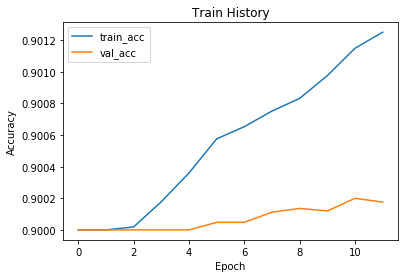

In [43]:
show_train_history('acc','val_acc')

## 評估模型準確率 binary_crossentropy
binary_crossentropy is for multi-label, categorical_crossentropy is for multi-class(一張圖應該只有一種答案)

In [44]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 39s 4ms/step

accuracy= 0.9002599771499634
